<a href="https://colab.research.google.com/github/csharpshooter/EIP/blob/master/A1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


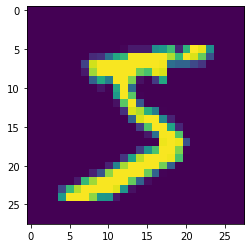

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D(2))

model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 10, 10))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (10, 10))`
  del sys.path[0]


In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1424 - acc: 0.9552
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0488 - acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0358 - acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0277 - acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0232 - acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0183 - acc: 0.9940
Epoch 7/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0152 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0130 - acc: 0.9957
Epoch 9/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0124 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0098 -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
print(score)

[0.04079107277436365, 0.9907]


In [0]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred[:9])
print(y_test[:9])

[[1.14253950e-18 1.40775751e-17 3.82445472e-14 1.88221921e-12
  4.84743866e-20 8.35268681e-19 3.22279133e-34 1.00000000e+00
  5.17258888e-19 2.67911539e-12]
 [5.30993489e-13 1.98266533e-12 1.00000000e+00 5.67951600e-15
  4.93216909e-16 3.16585658e-23 8.20663389e-14 5.12243847e-19
  5.11688836e-13 1.31432141e-20]
 [5.10723191e-14 9.99999881e-01 5.32663601e-11 5.91749075e-14
  8.82566056e-08 3.75343680e-11 1.24413500e-12 5.66998581e-09
  1.37275372e-10 3.10484691e-16]
 [1.00000000e+00 6.16727447e-20 4.68974496e-14 1.69690282e-15
  1.74706159e-12 1.50977733e-12 1.51472912e-09 3.48082075e-16
  9.07176938e-12 7.17351156e-09]
 [1.62675986e-17 1.29550375e-15 1.34260719e-14 1.40963819e-17
  1.00000000e+00 3.59541873e-20 4.06866751e-17 1.30381876e-14
  3.00908468e-13 5.88835924e-12]
 [2.22397733e-14 9.99999404e-01 1.12663308e-11 5.20953011e-14
  1.77831126e-07 1.10831982e-12 2.37011474e-13 3.99264707e-07
  4.86914398e-10 2.30070937e-14]
 [5.45710548e-22 2.81519430e-09 6.91300993e-14 1.90934742e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

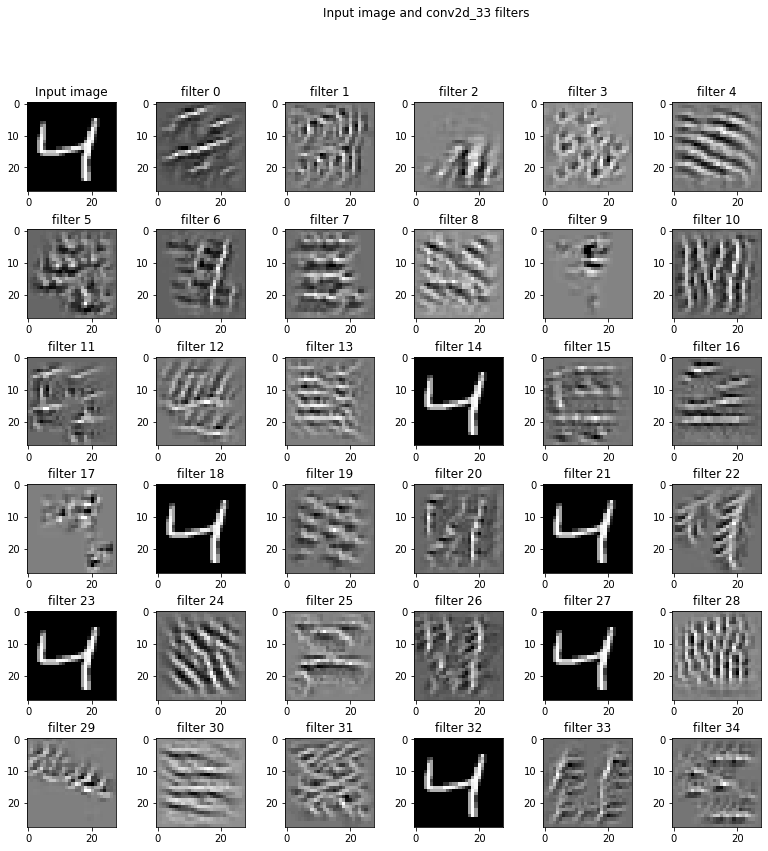

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_33'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()